In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [3]:
# Split data
train_img, test_img, train_lbl, test_lbl = train_test_split(


    mnist.data, mnist.target, test_size=0.3, random_state=0, stratify=mnist.target)

print(train_img.shape)

# Valid split
test_img, val_img, test_lbl, val_lbl = train_test_split(
    test_img, test_lbl, test_size=0.5, random_state=0, stratify=test_lbl)

class_counts = np.bincount(val_lbl.astype(int))

for class_id, count in enumerate(class_counts):
    print(f"Klasa {class_id}: {count} wzorców")

(49000, 784)
Klasa 0: 1036 wzorców
Klasa 1: 1181 wzorców
Klasa 2: 1048 wzorców
Klasa 3: 1071 wzorców
Klasa 4: 1024 wzorców
Klasa 5: 947 wzorców
Klasa 6: 1032 wzorców
Klasa 7: 1094 wzorców
Klasa 8: 1024 wzorców
Klasa 9: 1043 wzorców


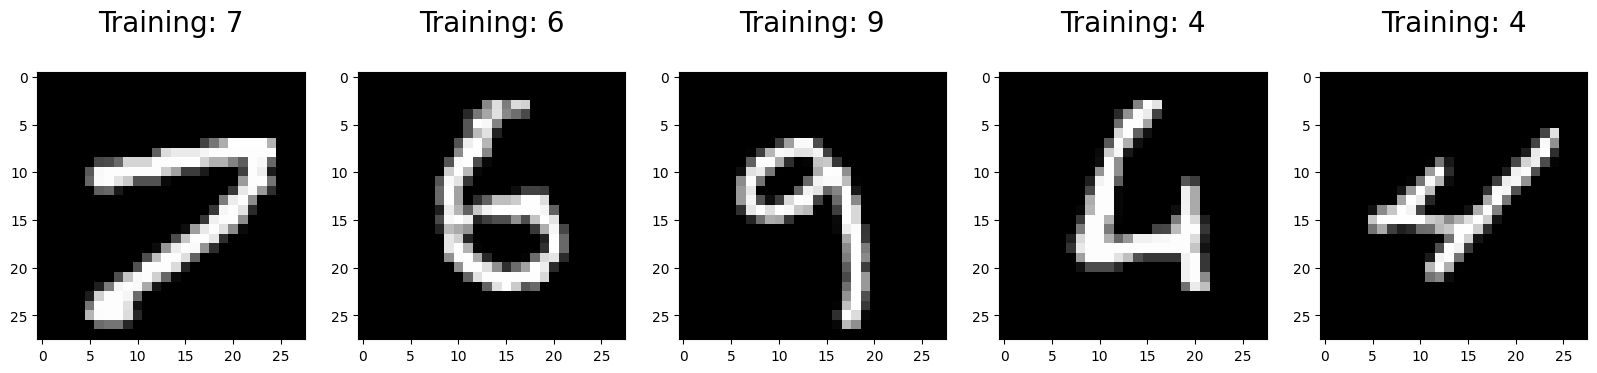

In [4]:
# Plot example data
plt.figure(figsize=(20, 4))


for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):

    plt.subplot(1, 5, index+1)

    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)

    plt.title('Training: %s\n' % label, fontsize=20)

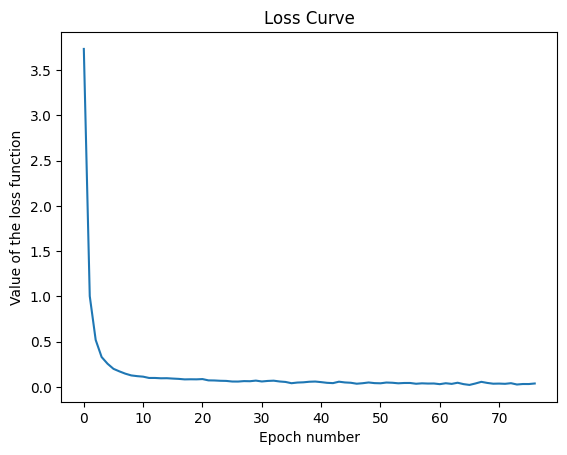

In [5]:
# Default
clf = MLPClassifier()

clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
# Loss function plot
plt.plot(clf.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
plt.show()

In [6]:
# Predicts
predictions_train = clf.predict(train_img)

predictions_test = clf.predict(test_img)

train_score = accuracy_score(predictions_train, train_lbl)


print('Score on train data: ', train_score)

test_score = accuracy_score(predictions_test, test_lbl)


print('Score on test data: ', test_score)

Score on train data:  0.994
Score on test data:  0.9626666666666667


In [7]:
# Five error predictions
index = 0

badIndex = 0

misclassifiedIndexes = []


for label, predict in zip(test_lbl, predictions):
    badIndex = badIndex+1
    if label != predict:
        misclassifiedIndexes.append(badIndex)
        print(misclassifiedIndexes[index], label,

              test_lbl[badIndex - 1], predict, predictions[badIndex - 1])
        index += 1

print(test_lbl[4], predictions[4])

78 3 3 2 2
86 8 8 5 5
91 3 3 5 5
104 2 2 0 0
121 3 3 2 2
124 7 7 0 0
146 5 5 1 1
199 9 9 5 5
219 3 3 8 8
287 5 5 6 6
348 5 5 3 3
371 9 9 5 5
402 5 5 6 6
480 3 3 5 5
517 3 3 8 8
520 9 9 5 5
541 2 2 4 4
622 5 5 6 6
633 1 1 8 8
680 4 4 3 3
691 2 2 7 7
693 7 7 3 3
705 2 2 0 0
708 7 7 9 9
842 9 9 7 7
912 5 5 0 0
915 3 3 8 8
923 9 9 4 4
983 8 8 5 5
1036 8 8 6 6
1044 5 5 3 3
1059 8 8 1 1
1064 3 3 2 2
1076 9 9 5 5
1109 3 3 5 5
1116 1 1 8 8
1125 9 9 5 5
1128 1 1 8 8
1136 6 6 8 8
1140 6 6 8 8
1141 7 7 3 3
1195 0 0 8 8
1204 8 8 5 5
1234 0 0 4 4
1264 5 5 3 3
1281 1 1 7 7
1311 8 8 6 6
1353 2 2 4 4
1389 7 7 2 2
1431 8 8 4 4
1469 0 0 6 6
1498 7 7 9 9
1522 7 7 1 1
1682 3 3 6 6
1700 2 2 9 9
1727 9 9 7 7
1731 2 2 8 8
1750 1 1 5 5
1846 4 4 6 6
1854 5 5 8 8
1880 2 2 4 4
1895 9 9 3 3
1937 2 2 1 1
1947 3 3 0 0
1967 5 5 9 9
1974 9 9 8 8
2003 1 1 6 6
2005 8 8 3 3
2026 5 5 6 6
2067 4 4 2 2
2082 7 7 4 4
2091 6 6 0 0
2093 9 9 7 7
2118 1 1 3 3
2131 9 9 4 4
2156 5 5 9 9
2187 6 6 5 5
2214 9 9 4 4
2215 6 6 8 8
2244 

78 2 3
86 5 8
91 5 3
104 0 2
121 2 3


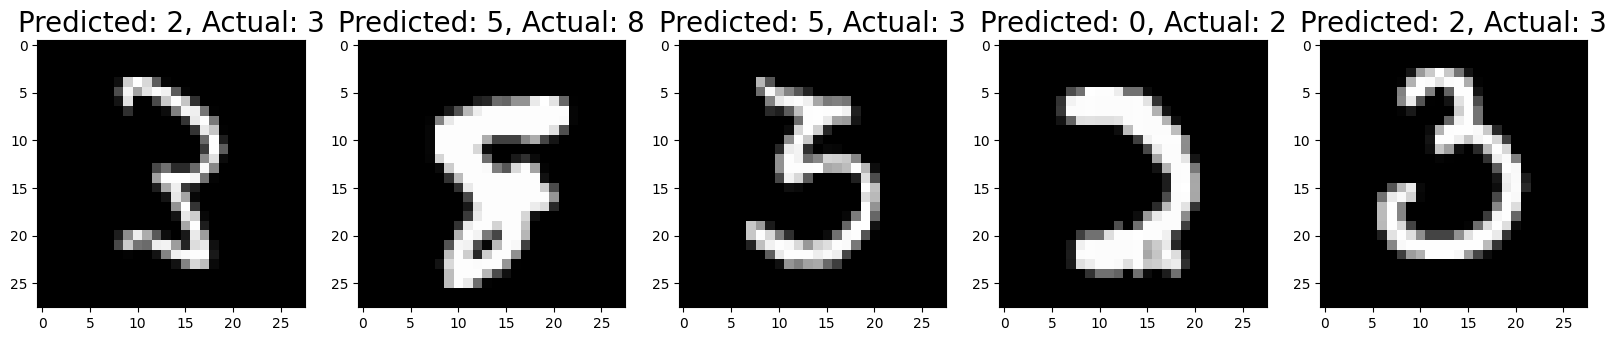

In [8]:
# Plot error predictions
plt.figure(figsize=(20, 4))


for plotIndex, badIndex, in enumerate(misclassifiedIndexes[0:5]):
    print(badIndex, predictions[badIndex - 1], test_lbl[badIndex - 1])
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex-1], (28, 28)), cmap=plt.cm.gray)

    plt.title('Predicted: {}, Actual: {}'.format(

        predictions[badIndex - 1], test_lbl[badIndex-1]), fontsize=20)

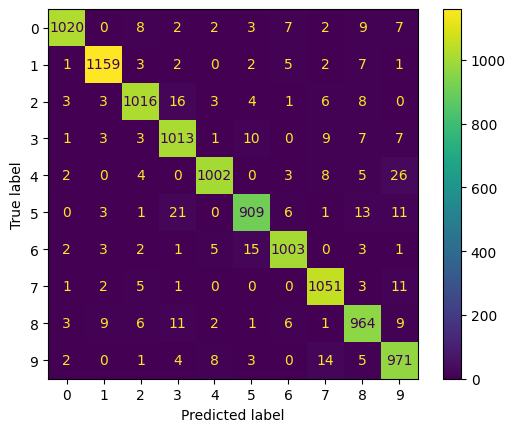

In [9]:
# Confusion matri
ConfusionMatrixDisplay.from_predictions(predictions_test, test_lbl)
plt.show()

sdg score:  0.9232380952380952


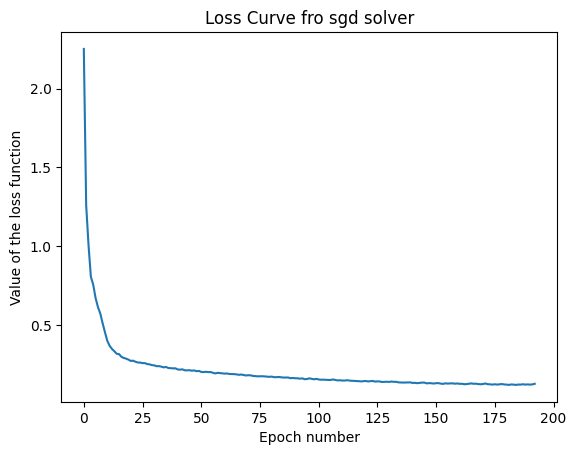

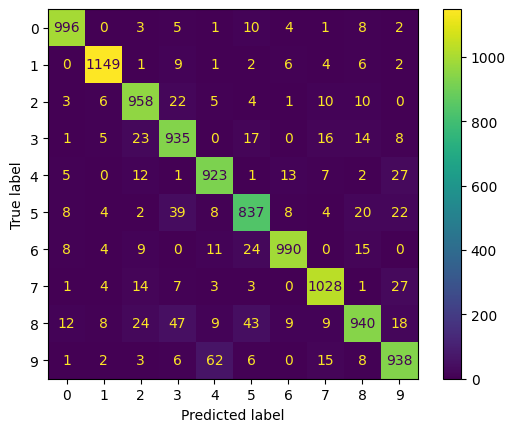

In [10]:
# sgd solver
clf = MLPClassifier(solver='sgd')

clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
score = accuracy_score(predictions, test_lbl)
print('sdg score: ', score)
# Loss function plot
plt.plot(clf.loss_curve_)
plt.title('Loss Curve fro sgd solver')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
plt.show()

(20,) score:  0.9288571428571428


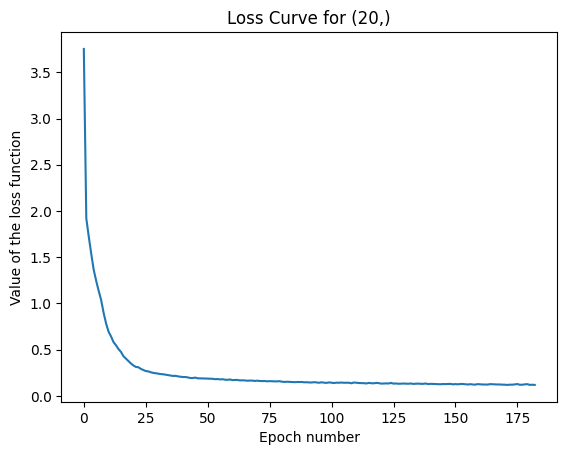

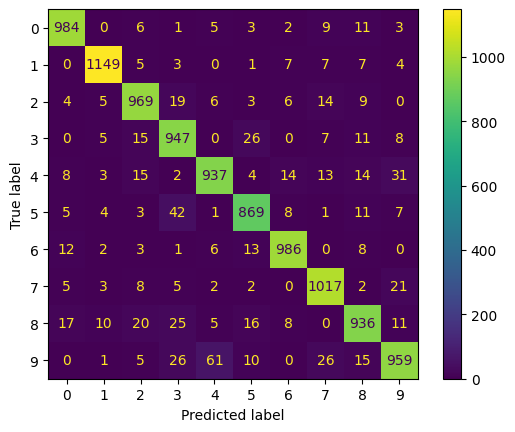

(300,) score:  0.9753333333333334


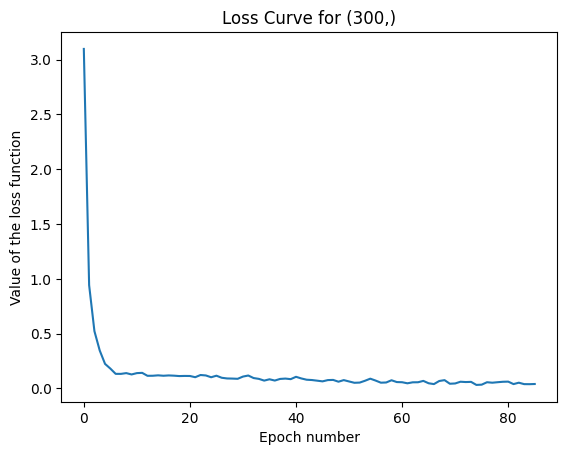

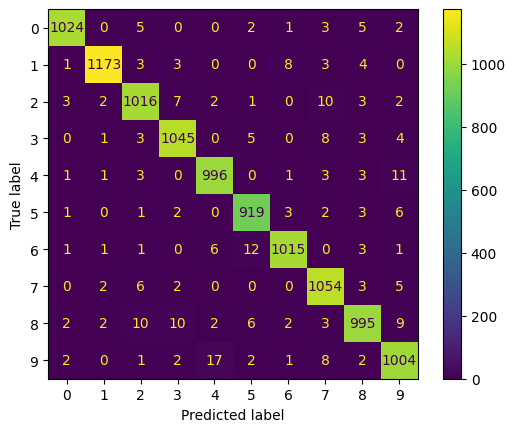

In [11]:
# Different neurons neurons
hidden_layer_sizes = [(20,), (300,)]
for h_layer_size in hidden_layer_sizes:
    clf = MLPClassifier(hidden_layer_sizes=h_layer_size)

    clf.fit(train_img, train_lbl)
    predictions = clf.predict(test_img)
    score = accuracy_score(predictions, test_lbl)
    print(f'{h_layer_size} score: ', score)
    # Loss function plot
    plt.plot(clf.loss_curve_)
    plt.title(f'Loss Curve for {h_layer_size}')
    plt.xlabel('Epoch number')
    plt.ylabel('Value of the loss function')
    ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
    plt.show()

c:\Users\pawel\projects\machine_learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Disable momentum score:  0.9418095238095238


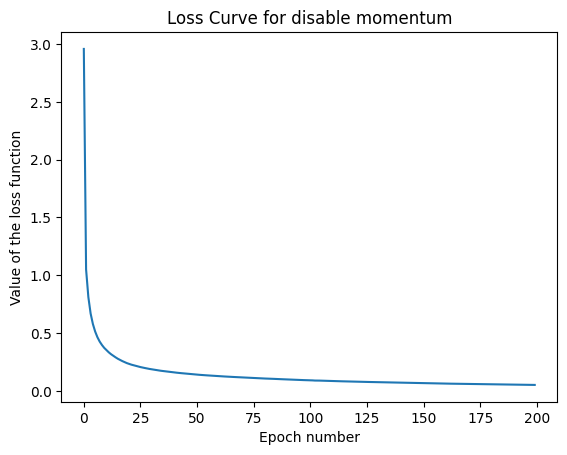

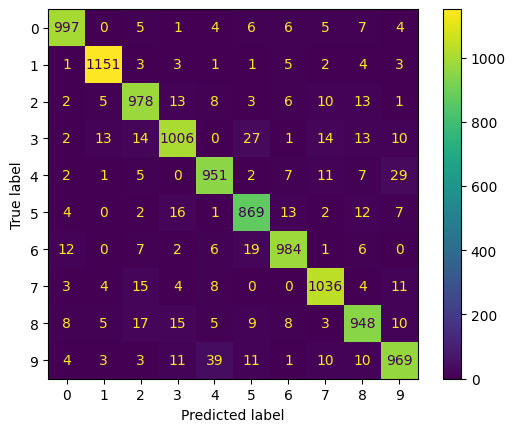

In [12]:
# Disable momentum
clf = MLPClassifier(solver='sgd', momentum=0)

clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
score = accuracy_score(predictions, test_lbl)
print('Disable momentum score: ', score)
# Loss function plot
plt.plot(clf.loss_curve_)
plt.title('Loss Curve for disable momentum')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
plt.show()

c:\Users\pawel\projects\machine_learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


10 score:  0.9392380952380952


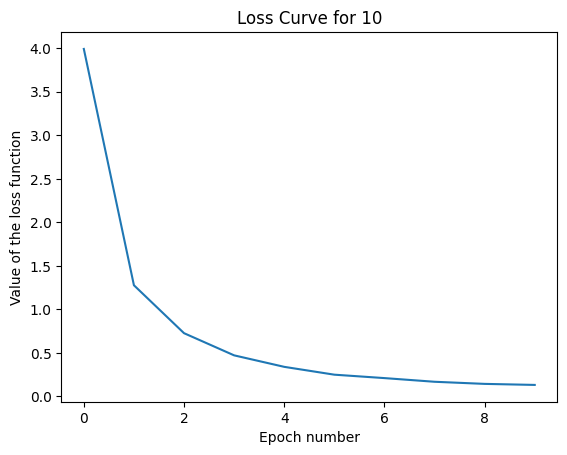

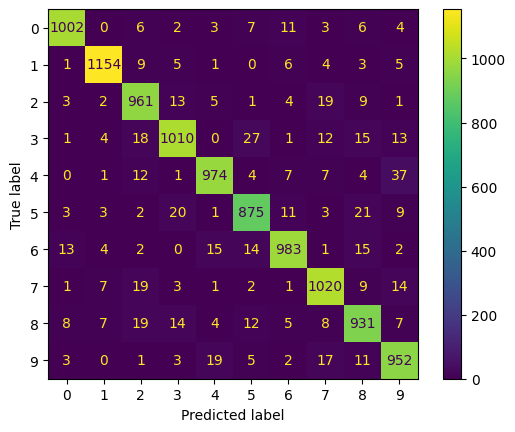

c:\Users\pawel\projects\machine_learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


50 score:  0.9605714285714285


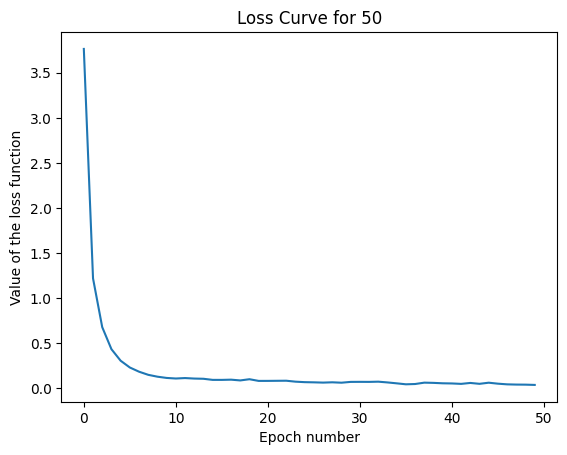

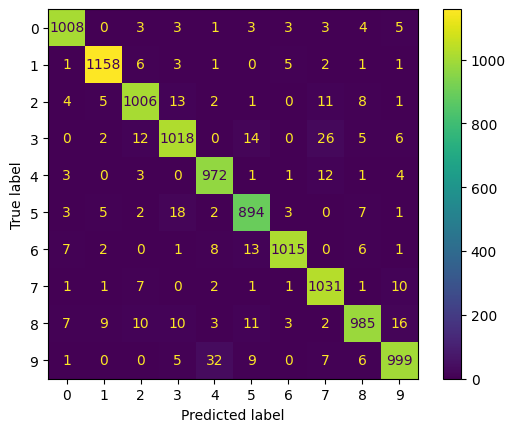

500 score:  0.9632380952380952


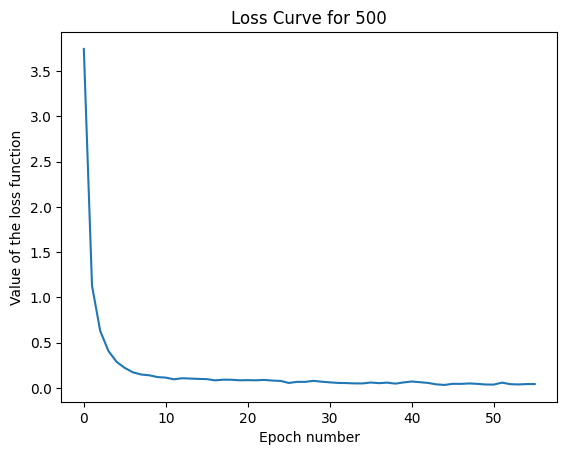

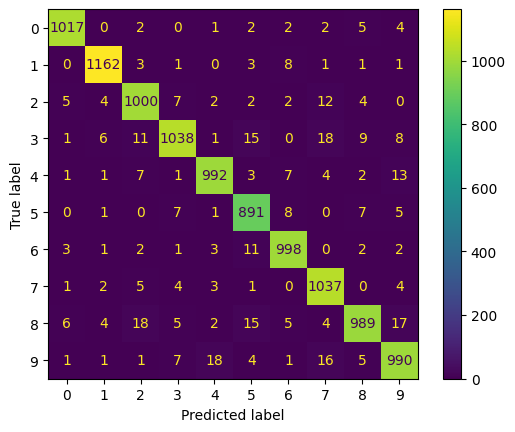

In [13]:
# max iteration
iteration = [10, 50, 500]
for max_i in iteration:
    clf = MLPClassifier(max_iter=max_i)

    clf.fit(train_img, train_lbl)
    predictions = clf.predict(test_img)
    score = accuracy_score(predictions, test_lbl)
    print(f'{max_i} score: ', score)
    # Loss function plot
    plt.plot(clf.loss_curve_)
    plt.title(f'Loss Curve for {max_i}')
    plt.xlabel('Epoch number')
    plt.ylabel('Value of the loss function')
    ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
    plt.show()

Early stopping score:  0.9580952380952381


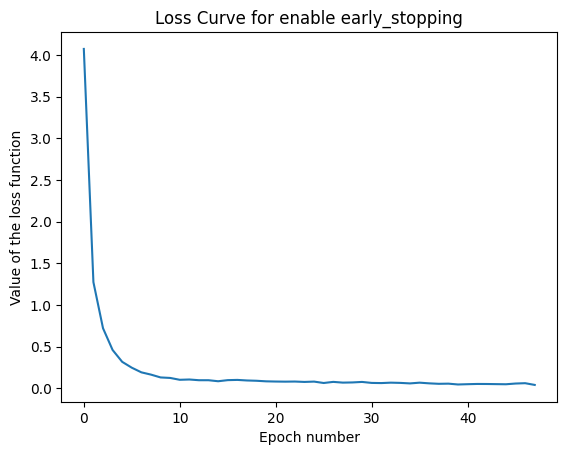

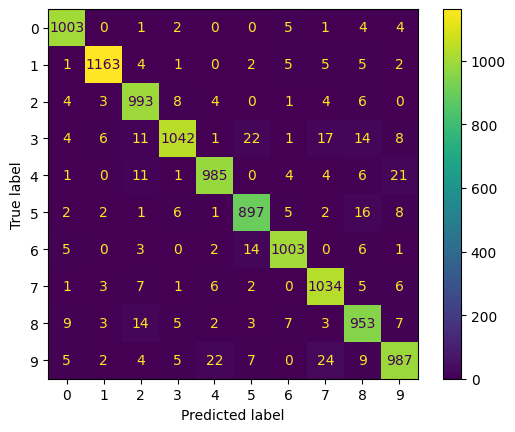

In [14]:
# early_stopping
clf = MLPClassifier(early_stopping=True)

clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
score = accuracy_score(predictions, test_lbl)
print('Early stopping score: ', score)
# Loss function plot
plt.plot(clf.loss_curve_)
plt.title('Loss Curve for enable early_stopping')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
plt.show()

sigmoidal activation score:  0.952952380952381


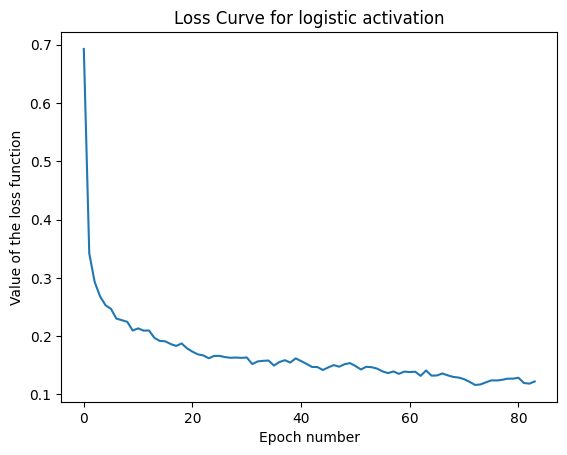

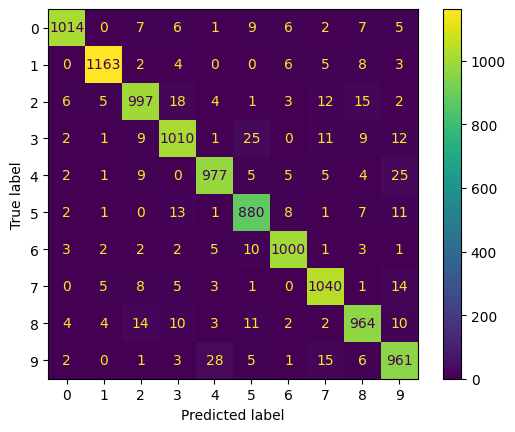

In [15]:
# Different activaction
clf = MLPClassifier(activation='logistic')

clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
score = accuracy_score(predictions, test_lbl)
print('sigmoidal activation score: ', score)
# Loss function plot
plt.plot(clf.loss_curve_)
plt.title('Loss Curve for logistic activation')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
plt.show()

In [16]:
# Hypoparameters to test
hidden_layer_sizes = [(50,), (100,), (300,)]
activation = ['identity', 'relu', 'tanh', 'logistic']
best_score = 0
best_params = None

In [17]:
for h_layer_size in hidden_layer_sizes:
    for act in activation:
        print(f'Training {h_layer_size} {act} combination')
        clf = MLPClassifier(hidden_layer_sizes=h_layer_size,
                            activation=act,)
        clf.fit(train_img, train_lbl)
        predictions_val = clf.predict(val_img)
        val_score = accuracy_score(predictions_val, val_lbl)
        if val_score > best_score:
            best_score = val_score
            best_params = {'hidden_layer_sizes': h_layer_size,
                           'activation': act}

print("Best scores: ", best_params)

Best scores:  {'hidden_layer_sizes': (300,), 'activation': 'relu'}


Final score:  0.9981904761904762


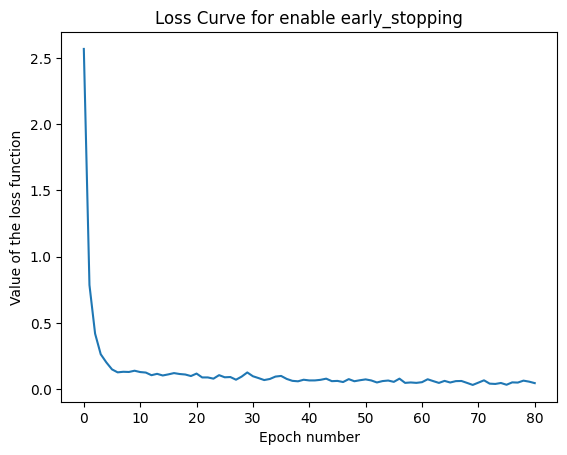

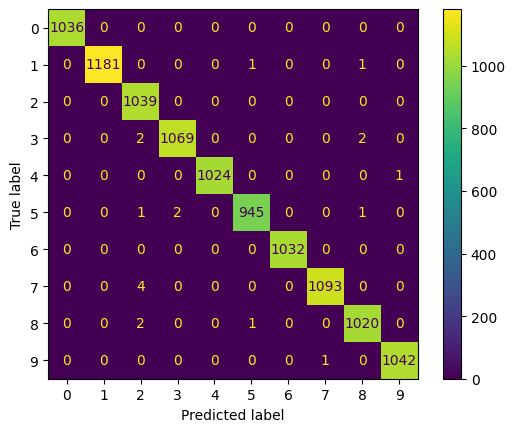

In [18]:
# Train final model with the best params
final_clf = MLPClassifier(**best_params)
final_clf.fit(np.concatenate((train_img, val_img)),
              np.concatenate((train_lbl, val_lbl)))
final_prediction = final_clf.predict(val_img)
final_score = accuracy_score(final_prediction, val_lbl)
print('Final score: ', final_score)
plt.plot(final_clf.loss_curve_)
plt.title('Loss Curve for enable early_stopping')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
ConfusionMatrixDisplay.from_predictions(final_prediction, val_lbl)
plt.show()